In [23]:
## 1 https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0 
##Auctor: Shashank Kapadia -- 2019  (Testa esse aqui tbm)

## 2 https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html -- doc

##3 https://sigmoidal.ai/como-criar-uma-wordcloud-em-python/  -- WorldClouds ## 
##4 http://tirandolicoesdetudo.com.br/criando-uma-nuvem-de-palavras-wordcloud-com-dados-do-meu-cv/ -- WorldCloud ##

##5 https://www.youtube.com/watch?v=iQ1bfDMCv_c&list=PLf6b7z7NwdGVMXPEvoJu64jxtE58q4CH8&index=3&t=9s - Videos da ALICE ZHAO##
#https://github.com/adashofdata/nlp-in-python-tutorial - 2018


## 6 https://gist.github.com/alopes/5358189 - lista de StopWords em português com correspondências. 


## 7 https://medium.com/@viniljf/utilizando-processamento-de-linguagem-natural-para-criar-um-sumariza%C3%A7%C3%A3o-autom%C3%A1tica-de-textos-775cb428c84e

##8 - https://medium.com/somos-tera/como-modelar-t%C3%B3picos-atrav%C3%A9s-de-latent-dirichlet-allocation-lda-atrav%C3%A9s-da-biblioteca-gensim-1fa17357ad4b -- 2020

In [ ]:
#python 3 and python 2 #para puxar as bibliotecas que estejam disponíveis na versões. 
#from __future__ import print_function 

In [32]:
# Importing modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
%matplotlib inline

In [33]:
#Ler os dados aqui. 
data_df = pd.read_csv('./datasets/docs_gospels_todos.csv', sep=';', encoding='utf-8')
#Imprima as linhas com .head()
data_df.head(10)

,caps,texts
0,Mateus 1,Registro da genealogia de Jesus Cristo filho d...
1,2,A Visita dos Magos 1 Depois que Jesus nasceu e...
2,3,1 Naqueles dias surgiu João Batista pregando n...
3,4,1 Então Jesus foi levado pelo Espírito ao dese...
4,5,As Bem-aventuranças (Lc 6.20-23) 1 Vendo as mu...
5,6,A Ajuda aos Necessitados 1 “Tenham o cuidado d...
6,7,1 “Não julguem para que vocês não sejam julgad...
7,8,1 Quando ele desceu do monte grandes multidões...
8,9,1 Entrando Jesus num barco atravessou o mar e ...
9,10,1 Chamando seus doze discípulos deu-lhes autor...


In [34]:
'''
def combined_text(docs):
    combined_text = ' '.join(docs)
    return combined_text

##Dados combinados dentro da coluna
docs = {key: [combine_text(value)] for (key,value) in docs.items}

pd.set_option('max_colwidth',150)

docs= pd.DataFrame.from_dict(data_combined).transpose()
docs.columns = ['doc']
docs = docs.sort_index()
docs 
'''

"\ndef combined_text(docs):\n    combined_text = ' '.join(docs)\n    return combined_text\n\n##Dados combinados dentro da coluna\ndocs = {key: [combine_text(value)] for (key,value) in docs.items}\n\npd.set_option('max_colwidth',150)\n\ndocs= pd.DataFrame.from_dict(data_combined).transpose()\ndocs.columns = ['doc']\ndocs = docs.sort_index()\ndocs \n"

In [35]:
#Removendo a coluna de capítulos, pois não precisamos das mesmas. 
data_df = data_df.drop('caps', axis=1) #df.drop('column_name', axis=1)
data_df.head()

,texts
0,Registro da genealogia de Jesus Cristo filho d...
1,A Visita dos Magos 1 Depois que Jesus nasceu e...
2,1 Naqueles dias surgiu João Batista pregando n...
3,1 Então Jesus foi levado pelo Espírito ao dese...
4,As Bem-aventuranças (Lc 6.20-23) 1 Vendo as mu...


In [36]:
# Let's take a look at our data again
#next(iter(data_df.keys()))

In [37]:
# Notice that our dictionary is currently in key: comedian, value: list of text format
#next(iter(data_df.values()))

In [38]:
""" 
combined_text=0
def combine_text(doc):
   '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(doc)
    return combined_text

print(combined_text)
"""

" \ncombined_text=0\ndef combine_text(doc):\n   '''Takes a list of text and combines them into one large chunk of text.'''\n    combined_text = ' '.join(doc)\n    return combined_text\n\nprint(combined_text)\n"

In [39]:
# Remove punctuation tutorial 5
import re
import string 

def clean_text_docs_round1(texts):
        texts= texts.lower()
        texts= re.sub('[.*-,/?!:;()\']', ' ',texts)
        texts= re.sub('[-|0:9]', ' ', texts)
        texts= re.sub('[%s]' % re.escape(string.punctuation), ' ',texts)
        texts= re.sub('\w*\d\w*', ' ',texts)
        return texts
    
round1 = lambda x: clean_text_docs_round1(x)
    
# Convert the titles to lowercase
#docs['doc'] = docs['doc'].map(lambda x: x.lower())
#docs['doc'] = docs['doc'].map(lambda x: re.sub('[,\.!?^~´`0:9]', ' ', x))
# Print out the first rows of papers
#docs['doc'].head()


In [40]:
#Atualizar documento com o texto atualizado fase 1
data_clean = pd.DataFrame(data_df.texts.apply(round1))
data_clean.head()

,texts
0,registro da genealogia de jesus cristo filho d...
1,a visita dos magos depois que jesus nasceu e...
2,naqueles dias surgiu joão batista pregando n...
3,então jesus foi levado pelo espírito ao dese...
4,as bem aventuranças lc vendo as mul...


In [41]:
# Apply a second round of cleaning
def clean_text_round2(texts):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    texts = re.sub('[.*‘’“”]', ' ', texts)
    texts = re.sub('\r', ' ', texts)
    texts = re.sub('\n', ' ', texts)
    return texts

round2 = lambda x: clean_text_round2(x)

In [42]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.texts.apply(round2))
data_clean.head(10)

,texts
0,registro da genealogia de jesus cristo filho d...
1,a visita dos magos depois que jesus nasceu e...
2,naqueles dias surgiu joão batista pregando n...
3,então jesus foi levado pelo espírito ao dese...
4,as bem aventuranças lc vendo as mul...
5,a ajuda aos necessitados tenham o cuidado d...
6,não julguem para que vocês não sejam julgad...
7,quando ele desceu do monte grandes multidões...
8,entrando jesus num barco atravessou o mar e ...
9,chamando seus doze discípulos deu lhes autor...


In [43]:
from spacy.lang.pt import Portuguese
nlp = Portuguese()  # use directly
nlp = spacy.blank("pt")

In [58]:
import spacy

nlp = spacy.load("pt_core_news_sm")
texts = data_clean['texts'].tolist()
doc = list(nlp.pipe(texts))

#for token in doc:
 #   print(token.text, token.lemma_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)
    
for token in doc:
    print(token.text, token.shape_,token.is_alpha, token.is_stop)
    


AttributeError: 'spacy.tokens.doc.Doc' object has no attribute 'shape_'

In [12]:
#Amazenar os dados em um formato pickle para ulilizado posteriormente
#import pickle
#data_clean.to_pickle('dados_limpos.pkl')

In [46]:
#lemmas = [token.lemma_ for token in doc if not token.is_stop]
#print(lemmas)

AttributeError: 'spacy.tokens.doc.Doc' object has no attribute 'is_stop'

In [13]:
#Lembrar de ver se é possivel pegar os capítulos e fazer a document_term_ matrix

In [14]:
#importando as NLTK libraries
#import nltk
#nltk.download('portuguese') #Biblioteca não está reconhecendo valores em porturguês

In [56]:
# coding: utf8
from __future__ import unicode_literals

STOP_WORDS = set("""
de 
a 
o 
que 
e 
do 
da 
em 
um 
para 
é 
com 
não 
uma 
os 
no 
se 
na 
por 
mais 
as 
dos 
como 
mas 
foi 
ao 
ele 
das 
tem 
à 
seu 
sua 
ou 
ser 
quando 
muito 
há 
nos 
já 
está 
eu 
também 
só 
pelo 
pela 
até 
isso 
ela 
entre 
era 
depois 
sem 
mesmo 
aos 
ter 
seus 
quem 
nas 
me 
esse 
eles 
estão 
você 
tinha 
foram 
essa 
num 
nem 
suas 
meu 
às 
minha 
têm 
numa 
pelos 
elas 
havia 
seja 
qual 
será 
nós 
tenho 
lhe 
deles 
essas 
esses 
pelas 
este 
fosse 
dele 
tu 
te 
vocês 
vos 
lhes 
meus 
minhas
teu 
tua
teus
tuas
nosso 
nossa
nossos
nossas
dela 
delas 
esta 
estes 
estas 
aquele 
aquela 
aqueles 
aquelas 
isto 
aquilo 
estou
está
estamos
estão
estive
esteve
estivemos
estiveram
estava
estávamos
estavam
estivera
estivéramos
esteja
estejamos
estejam
estivesse
estivéssemos
estivessem
estiver
estivermos
estiverem
hei
há
havemos
hão
houve
houvemos
houveram
houvera
houvéramos
haja
hajamos
hajam
houvesse
houvéssemos
houvessem
houver
houvermos
houverem
houverei
houverá
houveremos
houverão
houveria
houveríamos
houveriam
sou
somos
são
era
éramos
eram
fui
foi
fomos
foram
fora
fôramos
seja
sejamos
sejam
fosse
fôssemos
fossem
for
formos
forem
serei
será
seremos
serão
seria
seríamos
seriam
tenho
tem
temos
tém
tinha
tínhamos
tinham
tive
teve
tivemos
tiveram
tivera
tivéramos
tenha
tenhamos
tenham
tivesse
tivéssemos
tivessem
tiver
tivermos
tiverem
terei
terá
teremos
terão
teria
teríamos
teriam
perguntar
disse
lhes
digo-vos
dizer
havia
alguém
algo
alguma
""".split())

In [57]:
""" 
nlp = spacy.load("pt_core_news_sm")

stopwords=STOP_WORDS

texts = data_clean['texts'].tolist()
doc = list(nlp.pipe(texts))

nlp = spacy.load("pt", disable=['parser', 'tagger', 'ner'])
stops = stopwords.words("portuguese")

def normalize(comment, lowercase, remove_stopwords):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)


data_df['text_after_clean'] = data_clean['texts'].apply(normalize, lowercase=True, remove_stopwords=True)
"""

AttributeError: 'set' object has no attribute 'words'

In [64]:
#Exploratory Analysis
# Import the wordcloud library
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

#Concatenar as palavras
data_words = " ".join(list(data_clean['texts'].values)) #tutorial 1 

#stopwords=nltk.corpus.stopwords.words('portuguese')

stop_words= set(STOPWORDS) ##Definindo uma lista de STOPWORDS  Tutorial 6
stop_words.update(["de","a", "o", "que","e","do", "da", "em", "um", "para", "é", "com", "não", "uma", "os", 
                  "no", "se","na", "por","mais", "as", "dos", "como", "mas", "foi", "ao", "ele", "das", "tem",
                  "à","às","seu", "sua","ou","ser", "quando", "muito", "há", "nos", "já", "está", "eu", 
                  "também", "só","pelo", "pela","até", "isso" ,"ela", "entre", "era", "depois", "sem", "mesmo", 
                  "aos", "onde","ter", "seus", "quem", "nas", "me", "esse", "eles", "estão", 
                  "você","tinha", "foram", "essa","num", "nem", "suas", "meu", "às", "minha","têm",
                  "numa", "pelos", "elas","havia", "seja", "qual", "será", "nós", "tenho", 
                  "lhe", "deles", "essas", "esses","pelas", "este", "fosse", "dele","tu", "te",
                  "vocês","vos", "lhes", "meus", "minhas", "teu","tua", "teus", "tuas", "nosso", 
                  "nossa", "nossos","nossas", "dela", "delas", "esta", "estes",
                  "estas", "aquele", "aquela", "aqueles", "aquelas", "isto", "aquilo", "estou", "está", 
                  "estamos", "estão", "estive", "esteve", "estivemos", "estiveram", "estava", "estávamos", 
                  "estavam", "estivera", "estivéramos", "esteja","estejamos", "estejam","estivesse", "estivéssemos",
                  "estivessem", "estiver", "estivermos","estiverem", "hein", "há", "havemos", "hão", "houve", 
                  "houvemos", "houveram", "houvera","houvéramos", "haja", "hajamos", "hajam","houvesse", 
                  "houvéssemos","houvessem", "houver", "houvermos", "houverem", "houverei", 
                  "houverá", "houveremos", "houverão", "houveria","houveríamos", "houveriam" ,"sou" ,"somos",
                  "são" ,"era", "éramos" ,"eram", "fui", "foi", "fomos", "foram", "fora", "fôramos", "seja", 
                  "sejamos", "sejam", "fosse", "fôssemos", "fossem", "for" ,"formos", "forem", "serei", 
                  "será", "seremos", "serão","seria","seríamos" ,"seriam" ,"tenho","tem","temos",
                  "têm","tinha" ,"tínhamos" ,"tinham" ,"tive" ,"teve" ,"tivemos","tiveram","tivera","tivéramos",
                  "tenha", "tenhamos","tenham","tivesse","tivéssemos","tivessem","tiver","tivermos","tiverem",
                  "terei","terá","teremos","terão", "teria","teríamos","teriam","então","assim", "pois","digo",
                   "sobre","alguém",'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 
                   'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 
                   'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn','lc','mc','jo','mt','where','were'])


# Criar uma WordCloud # lower max_font_size
wordcloud= WordCloud(stopwords= stop_words,background_color="black",  
                     contour_width=3,contour_color="steelblue",
                     max_words=50000,random_state=42, width=1600, height=800,max_font_size=40).generate(data_words)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud.to_file("WorldCloud_lda_gospels.png") #Salva quando tiver certeza que as imagens estão certas. 


#Gerar a WordCloud
 #for index, doc in enumerate(data_clean.columns):


# Visualizar as WorldCloud
# Mostrar a imagem final 
#import matplotlib.pyplot as plt

#plt.title("Nuvem de palavras dos Evangelhos", fontsize=40, color="red")
#fig, ax=plt.subplots(figsize=(16,6))
#ax.imshow(wordcloud, interpolation="bilinear")
#ax.set_axis_off()
#wordcloud.to_image();
#wordcloud.to_file("WorldCloud_lda_gospels.png") #Salva quando tiver certeza que as imagens estão certas. 

KeyboardInterrupt: 

C:\Users\Klemer\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Klemer\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


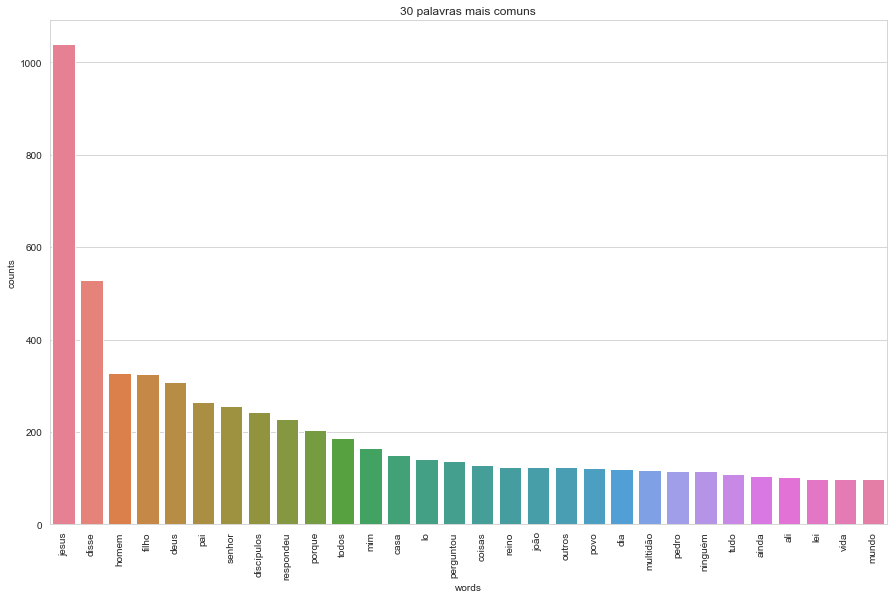

In [60]:
#Prepare text for LDA Analysis
# Load the library with the CountVectorizer method
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


# Helper function
def plot_30_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='30 palavras mais comuns')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    #plt.savefig('30_palavras_mais_comuns.png', format='png')


""" 
stop_words=set(STOPWORDS)
# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = [("de","a","o","que","e","do", "da", "em", "um", "para", "é", "com", "não", "uma", "os", "no", "se", "na", "por", 
                  "mais", "as", "dos", "como", "mas", "foi", "ao", "ele", "das", "tem", "à","às","seu", "sua","ou", 
                  "ser", "quando", "muito", "há", "nos", "já", "está", "eu", "também", "só", "pelo", "pela",  
                  "até", "isso" ,"ela", "entre", "era", "depois", "sem", "mesmo", "aos", "onde","ter", "seus", "quem", "nas", "me", "esse", "eles", "estão", "você","tinha", "foram", "essa", 
                  "num", "nem", "suas", "meu", "às", "minha","têm", "numa", "pelos", "elas","havia", "seja", "qual", "será", "nós", "tenho", "lhe", "deles", "essas", "esses", "pelas", "este", "fosse", "dele", 
                  "tu", "te","vocês","vos", "lhes", "meus", "minhas", "teu", "tua", "teus", "tuas", "nosso", "nossa", "nossos","nossas",
                  "dela", "delas", "esta", "estes", "estas", "aquele", "aquela", "aqueles", "aquelas", "isto", "aquilo", "estou", "está", 
                  "estamos", "estão", "estive", "esteve", "estivemos", "estiveram", "estava", "estávamos", "estavam", "estivera", "estivéramos", "esteja",
                  "estejamos", "estejam","estivesse", "estivéssemos","estivessem", "estiver", "estivermos", 
                  "estiverem", "hein", "há", "havemos", "hão", "houve", "houvemos", "houveram", "houvera", 
                  "houvéramos", "haja", "hajamos", "hajam","houvesse", "houvéssemos", "houvessem", "houver",
                   "houvermos", "houverem", "houverei", "houverá", "houveremos", "houverão", "houveria","houveríamos", "houveriam" ,"sou" ,"somos" ,"são" ,"era", "éramos" ,"eram", "fui", "foi", "fomos", "foram", "fora", "fôramos", "seja", 
                  "sejamos", "sejam", "fosse", "fôssemos", "fossem", "for","formos", "forem", "serei","será", "seremos", 
                  "serão","seria","seríamos" ,"seriam" ,"tenho","tem","temos",
                  "têm","tinha" ,"tínhamos" ,"tinham" ,"tive" ,"teve" ,"tivemos","tiveram","tivera","tivéramos",
                  "tenha", "tenhamos","tenham","tivesse","tivéssemos","tivessem","tiver","tivermos","tiverem",
                  "terei","terá","teremos","terão","teria","teríamos","teriam","então","assim", "pois")]
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
"""

#Adicionando novas Stop-Words
count_vectorizer= CountVectorizer(stop_words = stop_words)

#Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data_clean['texts'])

# Visualize the 30 most common words
plot_30_most_common_words(count_data, count_vectorizer) 


In [ ]:
#LDA model training and results visualization - tutorial 1 
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 30
number_words = 20
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

In [ ]:
#Analyzing LDA model results -- 8-https://medium.com/somos-tera/como-modelar-topicos-atraves-de-latent-dirichlet-allocation-lda-atraves-da-biblioteca-gensim-1fa17357ad4b
%time
from pyLDAvis import sklearn as sklearn_lda
#iit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if (1 == 1):
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

with open(LDAvis_data_filepath, 'w') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')